## Introduction to Natural Language Processing in Python
- learn natural language processing (NLP) basics, such as 
    - how to identify and separate words, how to extract topics in a text, and 
    - how to build your own fake news classifier. 
- learn how to use basic libraries such as
    - NLTK, alongside libraries which utilize deep learning to solve common NLP problems. 
- This course will give you the foundation to process and parse text



## Regular expressions & word tokenization
- learn some basic NLP concepts, such as word tokenization and regular expressions to help parse text. 
- also learn how to handle non-English text and more difficult tokenization you might find.

In [1]:
import re

In [2]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print('1. The sentences:',re.split(sentence_endings, my_string),'\n')

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print('2. All capitalized words:',re.findall(capitalized_words, my_string),'\n')

# Split my_string on spaces and print the result
spaces = r"\s+"
print('3. All words:',re.split(spaces, my_string), '\n')

# Find all digits in my_string and print the result
digits = r"\d+"
print('4. All digits:',re.findall(digits, my_string),'\n')


1. The sentences: ["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', ''] 

2. All capitalized words: ['Let', 'RegEx', 'Won', 'Can', 'Or'] 

3. All words: ["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?'] 

4. All digits: ['4', '19'] 



In [39]:
import pandas as pd

#scene_one= pd.read_csv('grail.txt',sep='\t',skiprows=1, low_memory=False)

# Open a file: file
file = open('grail.txt',mode='r')
 
# read all lines at once
scene_one = file.read()
 
# close the file
file.close()


In [7]:
# Import necessary modules


from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

In [18]:
for i in sentences[:10]:
    print(i)

SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!
[clop clop clop] 
SOLDIER #1: Halt!
Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.
King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.
We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.
I must speak with your lord and master.
SOLDIER #1: What?


In [21]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
tokenized_sent

['ARTHUR',
 ':',
 'It',
 'is',
 'I',
 ',',
 'Arthur',
 ',',
 'son',
 'of',
 'Uther',
 'Pendragon',
 ',',
 'from',
 'the',
 'castle',
 'of',
 'Camelot',
 '.']

In [41]:
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))
count = 0
unique_tokens_list=[]
for i in unique_tokens:
    count = count + 1
    if count == 10:
        break
    unique_tokens_list.append(i)
print(unique_tokens_list)

['carry', 'known', 'hacked', 'writing', 'vicious', 'Walk', 'ride', 'bois', 'bottoms']


In [43]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [48]:
# Use re.search to find the first text in square brackets
pattern1 = r'\[.*\]'
print(re.search(pattern1, scene_one))


# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[A-Z+]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>
<re.Match object; span=(0, 7), match='ARTHUR:'>


   ### Regex with NLTK tokenization

In [56]:
tweets = ['This is the best #nlp exercise I\'ve found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [53]:
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([\@\#]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[(len(tweets)-1)], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [57]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', "I've", 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


### Non-ascii tokenization

In [60]:
german_text = 'Wann gehen wir Pizza essen? bb Und fährst du mit Über? 🚕'
german_text

'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

- imported from `nltk.tokenize`: `regexp_tokenize` and `word_tokenize`.
- Unicode ranges for emoji are:

    - `('\U0001F300'-'\U0001F5FF')`, 
    - `('\U0001F600-\U0001F64F')`, 
    - `('\U0001F680-\U0001F6FF')`, and
    - `('\u2600'-\u26FF-\u2700-\u27BF')`.

In [61]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


In [64]:

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print('C1. All capitalized words:', regexp_tokenize(german_text, capital_words),'\n')
print('C2. All capitalized words:',re.b(capital_words, german_text))


C1. All capitalized words: ['Wann', 'Pizza', 'Und', 'Über'] 

C2. All capitalized words: ['Wann', 'Pizza', 'Und', 'Über']


In [65]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


In [72]:
holy_grail = scene_one
lines = holy_grail.split('\n')
lines[:10]

['SCENE 1: [wind] [clop clop clop] ',
 'KING ARTHUR: Whoa there!  [clop clop clop] ',
 'SOLDIER #1: Halt!  Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.',
 'SOLDIER #1: What?  Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?']

In [79]:
# Split the script into lines: lines
lines = holy_grail.split('\n')
lines[:10]


['SCENE 1: [wind] [clop clop clop] ',
 'KING ARTHUR: Whoa there!  [clop clop clop] ',
 'SOLDIER #1: Halt!  Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.',
 'SOLDIER #1: What?  Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?']

In [80]:
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

lines[:10]

['SCENE 1: [wind] [clop clop clop] ',
 ' Whoa there!  [clop clop clop] ',
 ' Halt!  Who goes there?',
 ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 ' Pull the other one!',
 ' I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.',
 ' What?  Ridden on a horse?',
 ' Yes!',
 " You're using coconuts!",
 ' What?']

In [85]:
# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s,r"\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]
line_num_words[:10]

[6, 5, 4, 25, 4, 40, 5, 1, 4, 1]

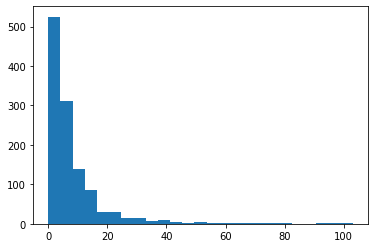

In [107]:
import matplotlib.pyplot as plt
plt.hist(line_num_words, bins=(25))

# Show bthe plot
plt.show()